In [1]:
import os
import zipfile
import random
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile

In [2]:
caminho_bases = os.path.join('bases', 'chest_xray')
caminho_train = os.path.join(caminho_bases, 'train')
caminho_test = os.path.join(caminho_bases, 'test')

In [3]:
for split in os.listdir(caminho_bases):
    caminho_split = os.path.join(caminho_bases, split)
    if os.path.isdir(caminho_split):
        for categoria in os.listdir(caminho_split):
            caminho_total = os.path.join(caminho_bases, split, categoria)
            if os.path.isdir(caminho_total):
                print(split, categoria, len(os.listdir(caminho_total)))


val NORMAL 9
val PNEUMONIA 9
train NORMAL 1342
train PNEUMONIA 3876
test NORMAL 234
test PNEUMONIA 390


(1782, 1433)


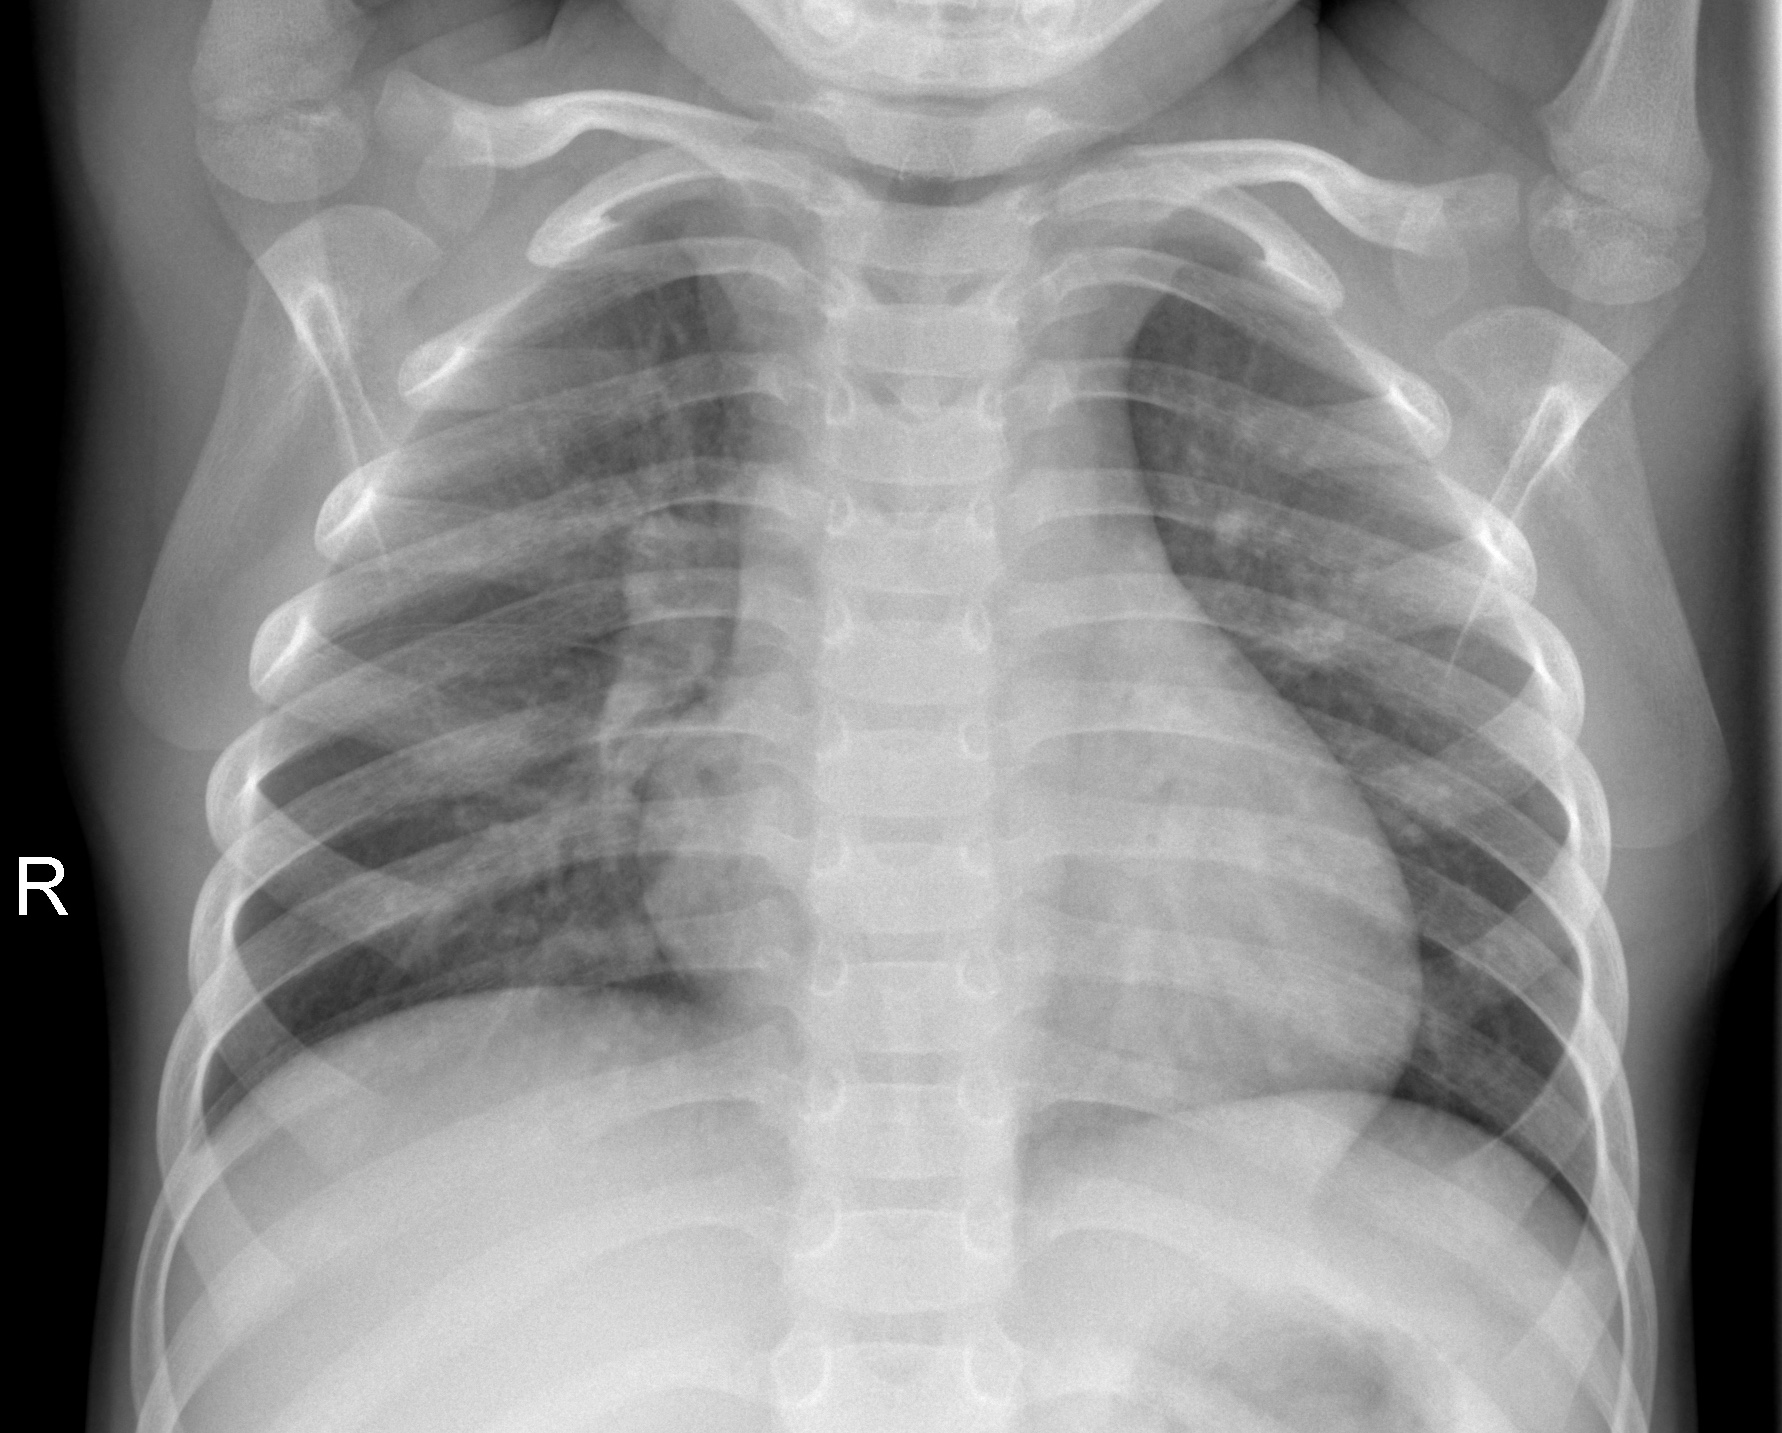

In [4]:
from PIL import Image
from random import sample
SAMPLE_DIR_NORMAL = os.path.join(caminho_train, 'NORMAL')
SAMPLE_NORMAL = sample(os.listdir(SAMPLE_DIR_NORMAL), 1)[0]
img_normal = Image.open(os.path.join(SAMPLE_DIR_NORMAL, SAMPLE_NORMAL))
print(img_normal.size)
img_normal

(904, 672)


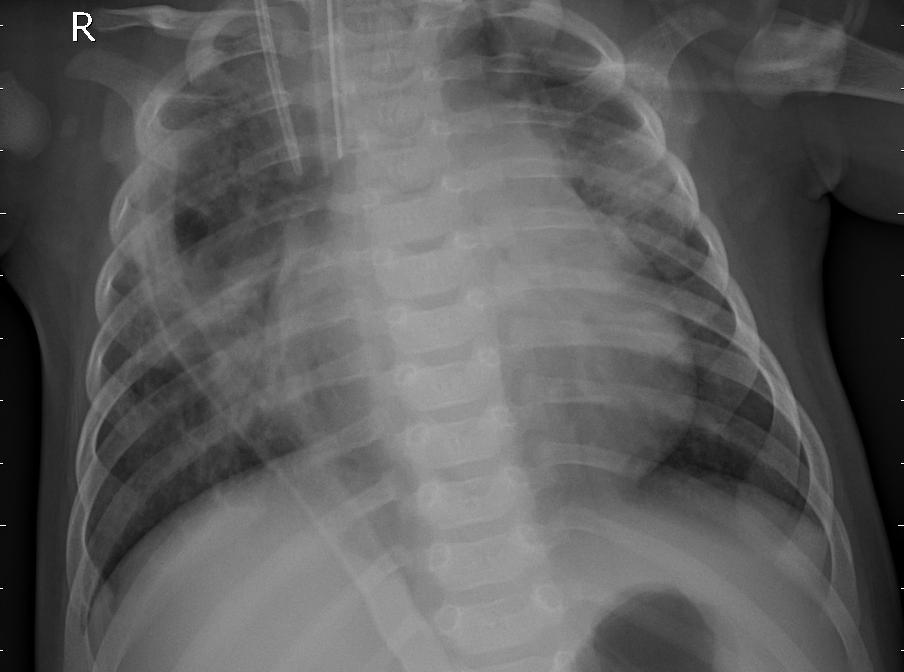

In [5]:
SAMPLE_DIR_PNEUMONIA = os.path.join(caminho_train, 'PNEUMONIA')
SAMPLE_PNEUMONIA = sample(os.listdir(SAMPLE_DIR_PNEUMONIA), 1)[0]
img_pneumonia = Image.open(os.path.join(SAMPLE_DIR_PNEUMONIA, SAMPLE_PNEUMONIA))

print(img_pneumonia.size)
img_pneumonia

In [6]:
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(150, 150, 3)),
  MaxPooling2D(pool_size=(2, 2)),
  Dropout(0.25),
  Conv2D(32, (3, 3), activation='relu'),
  MaxPooling2D(pool_size=(2, 2)),
  Dropout(0.25),
  Conv2D(64, (3, 3), activation='relu'),
  MaxPooling2D(pool_size=(2, 2)),
  Dropout(0.25),
  Conv2D(128, (3, 3), activation='relu'),
  Conv2D(128, (1, 1), activation='relu'),
  MaxPooling2D(pool_size=(2, 2)),
  Conv2D(256, (3, 3), activation='relu'),
  Conv2D(512, (1, 1), activation='relu'),
  Flatten(),
  Dense(512, activation='relu'),
  Dropout(0.2),
  Dense(1, activation='sigmoid')
 
])

model.compile(optimizer=RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['acc'])

In [7]:
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    caminho_train,
    target_size=(150, 150),
    batch_size=64,
    class_mode='binary'
)

validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = train_datagen.flow_from_directory(
    caminho_test,
    target_size=(150, 150),
    batch_size=16,
    class_mode='binary'
)


Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [8]:
history = model.fit_generator(train_generator,
                              epochs=15,
                              verbose=1,
                              validation_data=validation_generator)

Epoch 1/15
82/82 [==============================] - 97s 1s/step - loss: 0.8733 - acc: 0.7395 - val_loss: 0.6353 - val_acc: 0.6250
Epoch 2/15
82/82 [==============================] - 78s 955ms/step - loss: 0.3913 - acc: 0.8564 - val_loss: 0.5372 - val_acc: 0.7051
Epoch 3/15
82/82 [==============================] - 82s 1s/step - loss: 0.2299 - acc: 0.9118 - val_loss: 0.5768 - val_acc: 0.7644
Epoch 4/15
82/82 [==============================] - 84s 1s/step - loss: 0.1894 - acc: 0.9279 - val_loss: 0.4564 - val_acc: 0.8285
Epoch 5/15
82/82 [==============================] - 80s 974ms/step - loss: 0.1254 - acc: 0.9526 - val_loss: 0.5435 - val_acc: 0.8125
Epoch 6/15
82/82 [==============================] - 80s 973ms/step - loss: 0.1132 - acc: 0.9599 - val_loss: 0.9083 - val_acc: 0.7580
Epoch 7/15
82/82 [==============================] - 80s 978ms/step - loss: 0.1019 - acc: 0.9622 - val_loss: 0.7925 - val_acc: 0.7564
Epoch 8/15
82/82 [==============================] - 80s 978ms/step - loss: 0.0